In [38]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
from scipy.integrate import odeint
from scipy.optimize import fsolve
def func(a,b,N):
    H=(b-a)/(N-1) # H is given in the question
    t=[]
    for i in range(N):
        c=a+H*i
        t=t+[c]
    return t,H

def EulerOdeSys(f,c,t):
    M=len(c)
    Z=np.zeros((N,M))
    Z[0]=c
    for k in range(0,N-1):
        Z[k+1]=Z[k]+H*np.array(f(Z[k],t[k]))
    return Z
# def f(x):
#     return x-Z[k]-h*F(x,t[k])

# x = fsolve(f,0.01)
# f(x)

# print(x)

In [6]:
def f2(x,t):
    y=[(-1/2)*x[0],(1/2)*x[0]-(1/4)*x[1],(1/4)*x[1]-(1/6)*x[2]]
    return y
t,H=func(0,4,5)
c=[1,1,1]
N=5
EulerOdeSys(f2,c,t)

array([[1.        , 1.        , 1.        ],
       [0.5       , 1.25      , 1.08333333],
       [0.25      , 1.1875    , 1.21527778],
       [0.125     , 1.015625  , 1.30960648],
       [0.0625    , 0.82421875, 1.34524498]])

In [7]:
def f2(x,t):
    y=[(-1/2)*x[0],(1/2)*x[0]-(1/4)*x[1],(1/4)*x[1]-(1/6)*x[2]]
    return y
t,H=func(0,1,100)
c=np.array([1,1,1])
N=100
A=EulerOdeSys(f2,c,t)

### Implicit Euler Method

In [8]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import fsolve
def func(a,b,N):
    H=(b-a)/(N-1) # H is given in the question
    t=[]
    for i in range(N):
        c=a+H*i
        t=t+[c]
    return t,H

def Implicit(f,c,t):
    M=len(c)
    Z=np.zeros((N,M))
    Z[0]=c
    for k in range(0,N-1):
        def func(y):
            return y-Z[k]-H*np.array(f(y,t[k+1]))
        y = fsolve(func,c)
        Z[k+1]=y
    return Z


In [9]:
def f2(x,t):
    y=[(-1/2)*x[0],(1/2)*x[0]-(1/4)*x[1],(1/4)*x[1]-(1/6)*x[2]]
    return y
t,H=func(0,1,100)
c=np.array([1,1,1])
N=100
Z=Implicit(f2,c,t)


In [10]:
t=np.linspace(0,1,100)
x=Z[:,0]
y=Z[:,1]
z=Z[:,2]
ex=np.exp(-t/2)
ey=-2*np.exp(-t/2)+3*np.exp(-t/4)
ez=(3/2)*np.exp(-t/2)-9*np.exp(-t/4)+(17/2)*np.exp(-t/6)
err1=abs(x-ex)
err2=abs(y-ey)
err3=abs(z-ez)

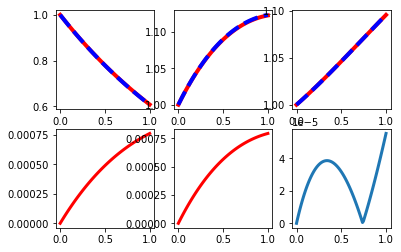

In [11]:
plt.subplot(2,3,1)
plt.plot(t,x,'r',linewidth=4,label='approximate')
plt.plot(t,ex,'--b',linewidth=4, label='exact')
plt.subplot(2,3,2)
plt.plot(t,y,'r',linewidth=4)
plt.plot(t,ey,'--b',linewidth=4)
plt.subplot(2,3,3)
plt.plot(t,z,'r',linewidth=4)
plt.plot(t,ez,'--b',linewidth=4)
plt.subplot(2,3,4)
plt.plot(t,err1,'r',linewidth=3)
plt.subplot(2,3,5)
plt.plot(t,err2,'r',linewidth=3)
plt.subplot(2,3,6)
plt.plot(t,err3,linewidth=3)

### Modified Euler Formula

In [12]:
def ModifiedEuler(f,c,t):
    M=len(c)
    T=np.zeros((N,M))
    T[0]=c
    for k in range(0,N-1):
        tp=T[k]+H*np.array(f(T[k],t[k]))
        T[k+1]=T[k]+H*np.array(f(T[k],tp))
    return T

In [13]:
t,H=func(0,1,100)
c=np.array([1,1,1])
N=100
T=ModifiedEuler(f2,c,t)


In [14]:
t=np.linspace(0,1,100)
x=T[:,0]
y=T[:,1]
z=T[:,2]
ex=np.exp(-t/2)
ey=-2*np.exp(-t/2)+3*np.exp(-t/4)
ez=(3/2)*np.exp(-t/2)-9*np.exp(-t/4)+(17/2)*np.exp(-t/6)
err1=abs(x-ex)
err2=abs(y-ey)
err3=abs(z-ez)

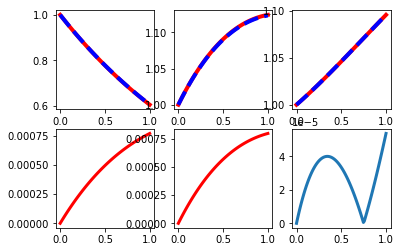

In [15]:
plt.subplot(2,3,1)
plt.plot(t,x,'r',linewidth=4,label='approximate')
plt.plot(t,ex,'--b',linewidth=4, label='exact')
plt.subplot(2,3,2)
plt.plot(t,y,'r',linewidth=4)
plt.plot(t,ey,'--b',linewidth=4)
plt.subplot(2,3,3)
plt.plot(t,z,'r',linewidth=4)
plt.plot(t,ez,'--b',linewidth=4)
plt.subplot(2,3,4)
plt.plot(t,err1,'r',linewidth=3)
plt.subplot(2,3,5)
plt.plot(t,err2,'r',linewidth=3)
plt.subplot(2,3,6)
plt.plot(t,err3,linewidth=3)

### Second order Runge Kutta

In [16]:
def SecondRungeKutta(f,c,t):
    M=len(c)
    U=np.zeros((N,M))
    U[0]=c
    for k in range(0,N-1):
        k1=H*np.array(f(U[k],t[k]))
        k2=H*np.array(f(U[k]+k1,t[k+1]))
        U[k+1]=U[k]+(1/2)*(k1+k2)
    return U

In [17]:
t,H=func(0,1,100)
c=np.array([1,1,1])
N=100
U=ModifiedEuler(f2,c,t)


In [18]:
t=np.linspace(0,1,100)
x=U[:,0]
y=U[:,1]
z=U[:,2]
ex=np.exp(-t/2)
ey=-2*np.exp(-t/2)+3*np.exp(-t/4)
ez=(3/2)*np.exp(-t/2)-9*np.exp(-t/4)+(17/2)*np.exp(-t/6)
err1=abs(x-ex)
err2=abs(y-ey)
err3=abs(z-ez)


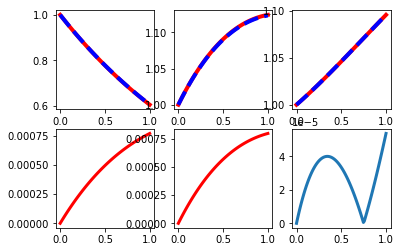

In [19]:
plt.subplot(2,3,1)
plt.plot(t,x,'r',linewidth=4,label='approximate')
plt.plot(t,ex,'--b',linewidth=4, label='exact')
plt.subplot(2,3,2)
plt.plot(t,y,'r',linewidth=4)
plt.plot(t,ey,'--b',linewidth=4)
plt.subplot(2,3,3)
plt.plot(t,z,'r',linewidth=4)
plt.plot(t,ez,'--b',linewidth=4)
plt.subplot(2,3,4)
plt.plot(t,err1,'r',linewidth=3)
plt.subplot(2,3,5)
plt.plot(t,err2,'r',linewidth=3)
plt.subplot(2,3,6)
plt.plot(t,err3,linewidth=3)

### Third order Runge Kutta

In [20]:
def ThirdRungeKutta(f,c,t):
    M=len(c)
    V=np.zeros((N,M))
    V[0]=c
    for k in range(0,N-1):
        k1=H*np.array(f(V[k],t[k]))
        k2=H*np.array(f(V[k]+(1/2)*k1,t[k]+(1/2)*H))
        V[k+1]=V[k]+k2
    return V

In [21]:
t,H=func(0,1,100)
c=np.array([1,1,1])
N=100
V=ModifiedEuler(f2,c,t)


In [22]:
t=np.linspace(0,1,100)
x=V[:,0]
y=V[:,1]
z=V[:,2]
ex=np.exp(-t/2)
ey=-2*np.exp(-t/2)+3*np.exp(-t/4)
ez=(3/2)*np.exp(-t/2)-9*np.exp(-t/4)+(17/2)*np.exp(-t/6)
err1=abs(x-ex)
err2=abs(y-ey)
err3=abs(z-ez)

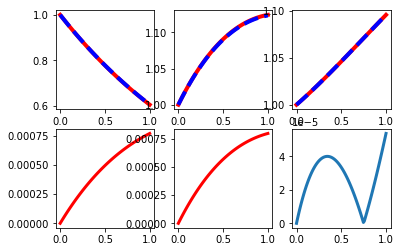

In [23]:
plt.subplot(2,3,1)
plt.plot(t,x,'r',linewidth=4,label='approximate')
plt.plot(t,ex,'--b',linewidth=4, label='exact')
plt.subplot(2,3,2)
plt.plot(t,y,'r',linewidth=4)
plt.plot(t,ey,'--b',linewidth=4)
plt.subplot(2,3,3)
plt.plot(t,z,'r',linewidth=4)
plt.plot(t,ez,'--b',linewidth=4)
plt.subplot(2,3,4)
plt.plot(t,err1,'r',linewidth=3)
plt.subplot(2,3,5)
plt.plot(t,err2,'r',linewidth=3)
plt.subplot(2,3,6)
plt.plot(t,err3,linewidth=3)

### Initial Boundary value problem

In [24]:
def sol(N,a,b):
    h=(b-a)/(N-1)
    A=np.zeros((N,N))
    A[0,0]=1
    A[N-1,N-1]=1
    for i in range(1,N-1):
        A[i,i]=-2
        A[i,i+1]=1
        A[i,i-1]=1
    return A
        

In [25]:
sol(10,0,1)

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [26]:
from math import *
def error(x1,x2):
    s=0
    for i in range(len(x1)):
        s=s+(x1[i]-x2[i])**2
    return sqrt(s)


### Plot order of convergence

In [50]:
a=0
b=1
from math import *
# H1=[0.01*i for i in range(1,51)]
H1=[1/(2**i) for i in range(1,10)]
err=[]
M=len(H1)
G=[]
for i in range(M):
    H=H1[i]
    G=G+[log(H)]
    N=int((b-a)/H)+1
    t=np.linspace(a,b,N)
    exa=np.exp(-t/2)
    d=ModifiedEuler(f2,c,t)
    y1=d[:,0].reshape(-1,1)
    er1=error(exa,y1)
    err=err+[log(er1)]

<AxesSubplot:xlabel='logh', ylabel='logerr'>

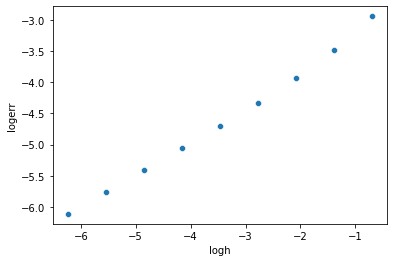

In [51]:
data={'logh': G,'logerr': err }
data=pd.DataFrame(data)
sns.scatterplot(data=data,
               x='logh',
               y='logerr')


In [52]:
X=data["logh"].values.reshape(-1,1)
y=data["logerr"].values.reshape(-1,1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
# creation of our linear regression
reg=linear_model.Ridge(alpha=0.5)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
# The coefficients
coef= reg.coef_
coef=coef[0]
intercept= reg.intercept_
print('intercept: \n', reg.intercept_)
# The mean squared error

intercept: 
 [-2.71539443]


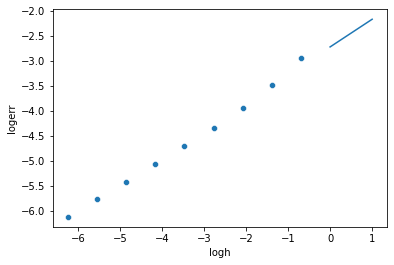

In [53]:
a=coef[0]
b=intercept[0]
y=a*t+b
sns.scatterplot(data=data,
               x='logh',
               y='logerr')
plt.plot(t,y)

2


In [44]:
logerr

NameError: name 'logerr' is not defined